In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
data=pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [10]:
print(data['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

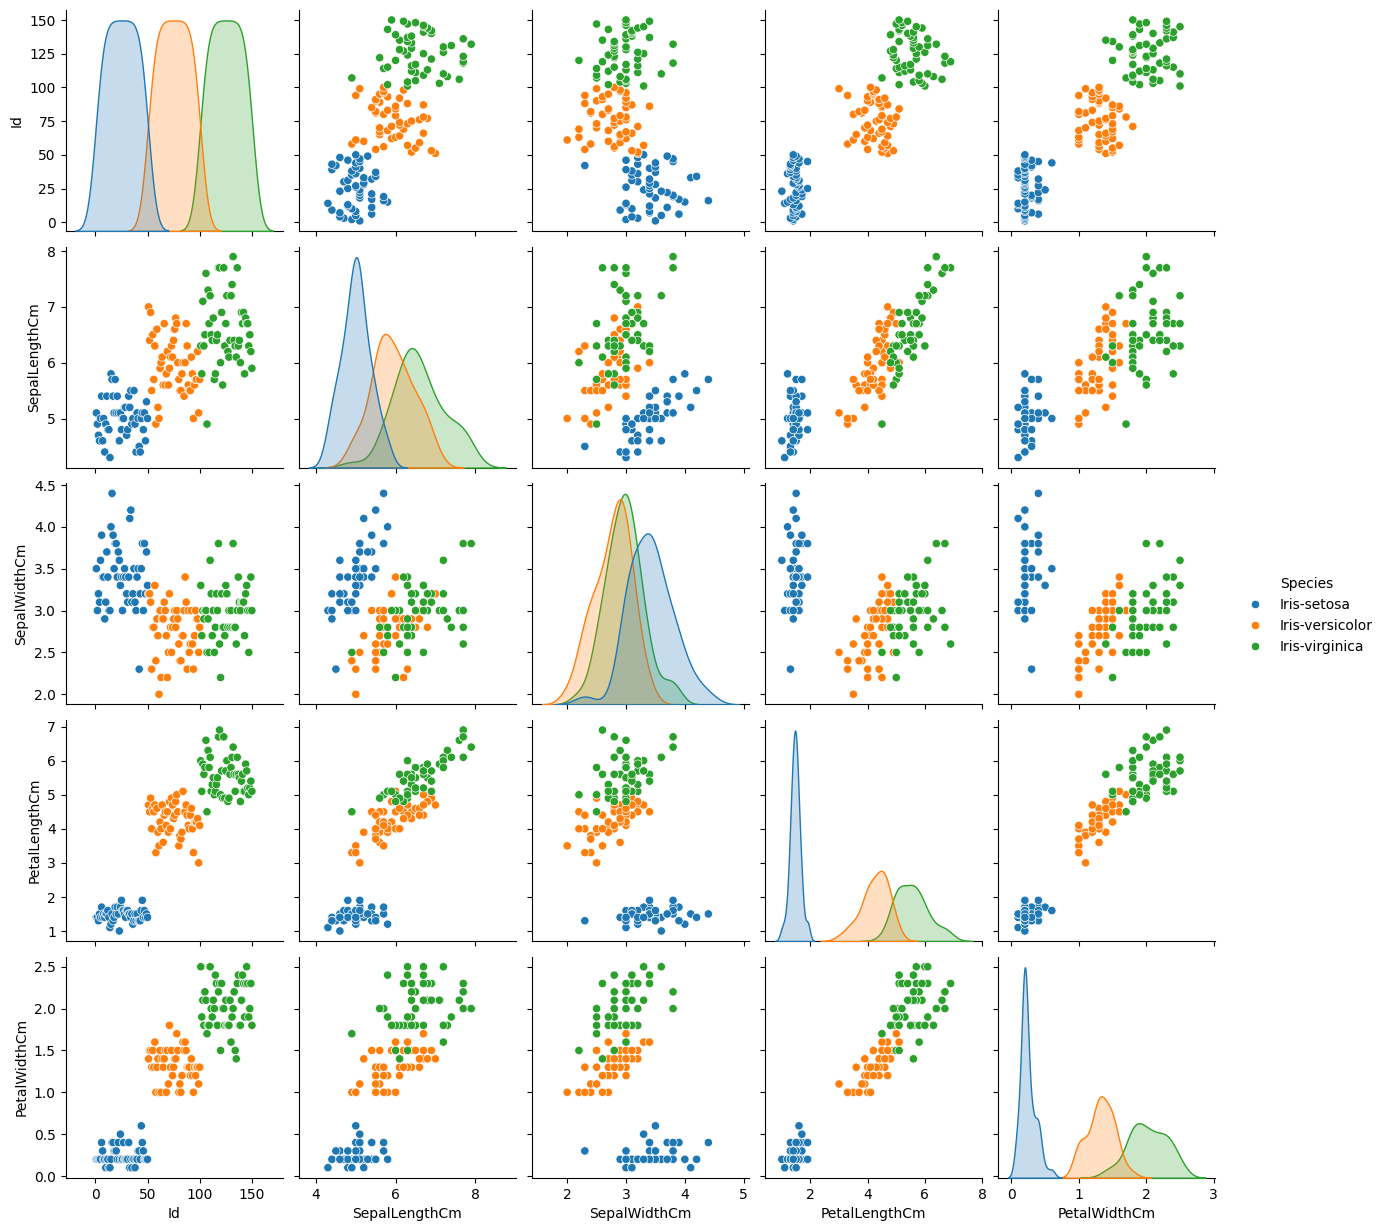

In [13]:
sns.pairplot(data,hue='Species')

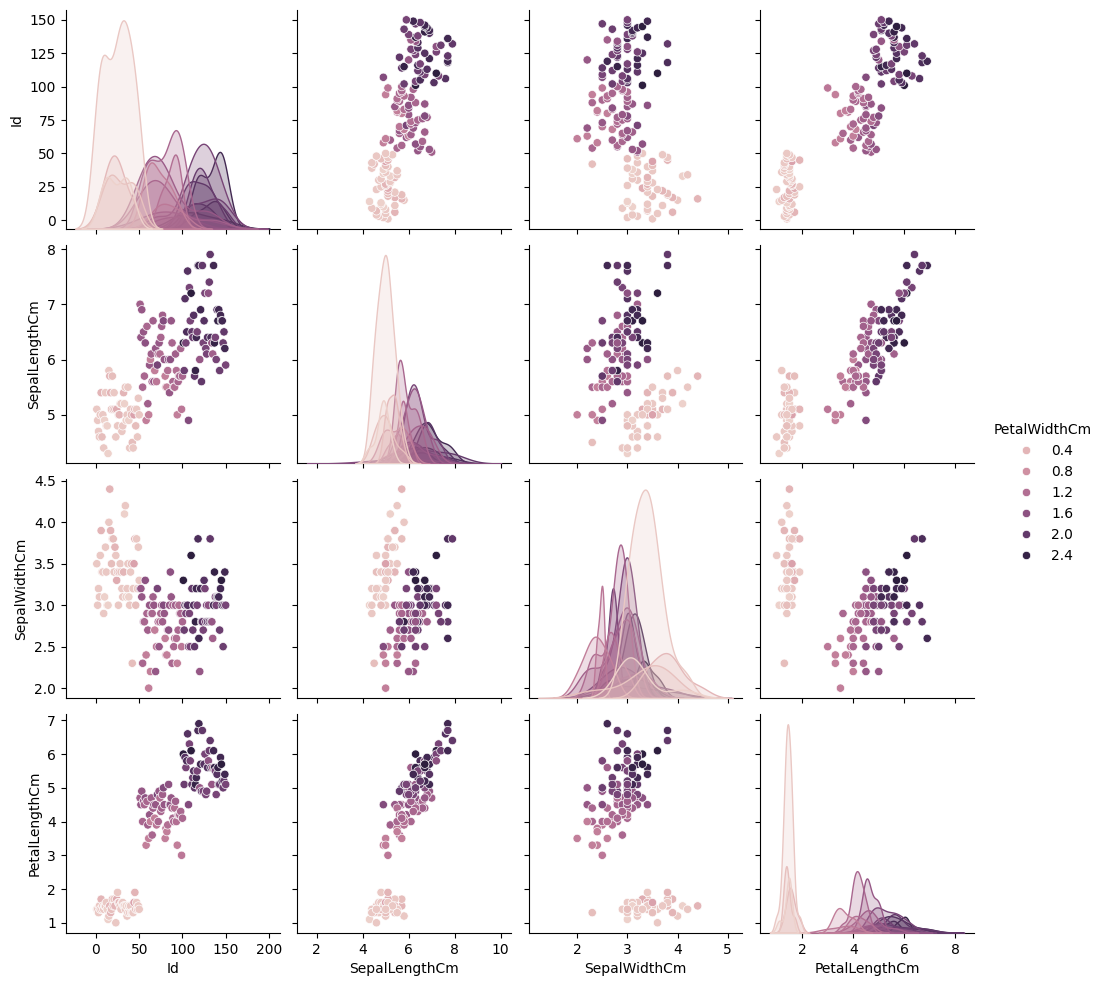

In [17]:
sns.pairplot(data,hue='PetalWidthCm');

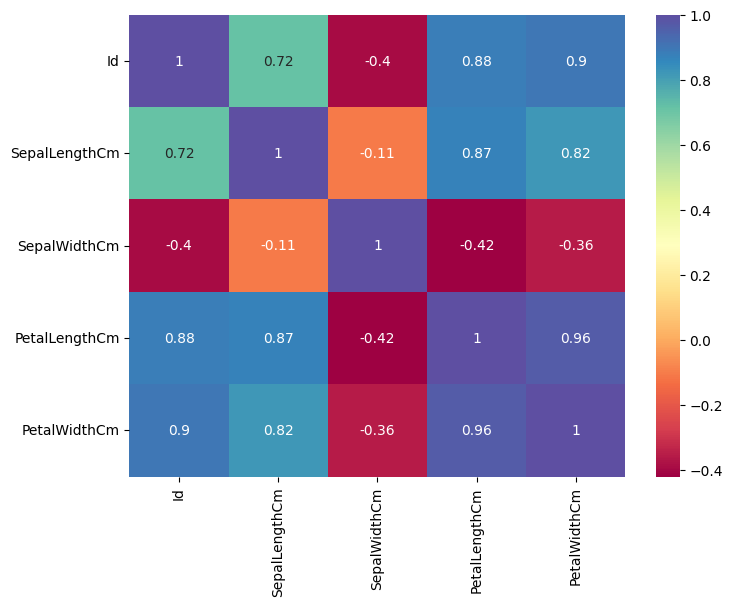

In [24]:
correlation=data.drop(columns=['Species']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='Spectral')
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X=data.drop(columns=['Species'])
y=data['Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt=dt_model.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred_dt))

1.0


In [36]:
print(classification_report(y_test,y_pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



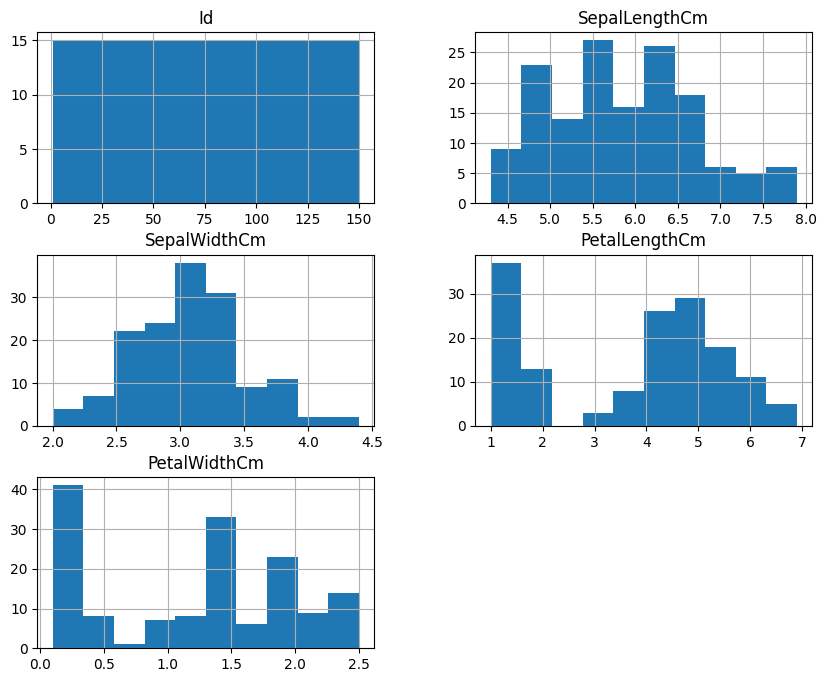

In [38]:
data.hist(figsize=(10,8))
plt.show()

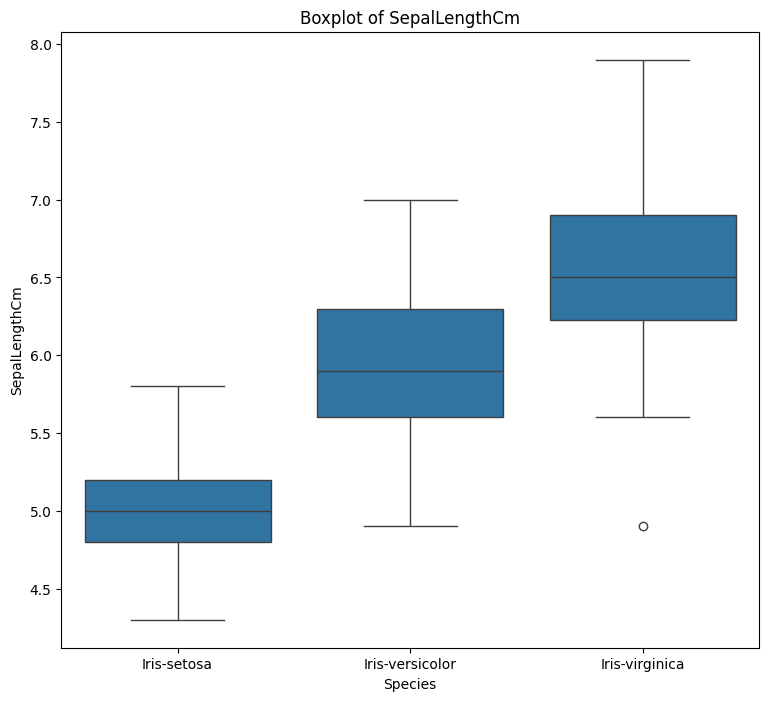

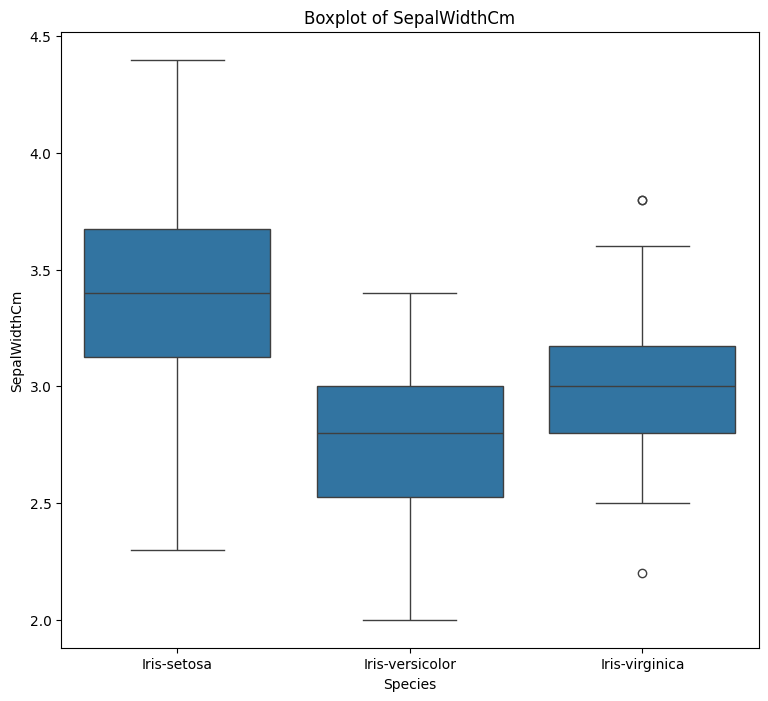

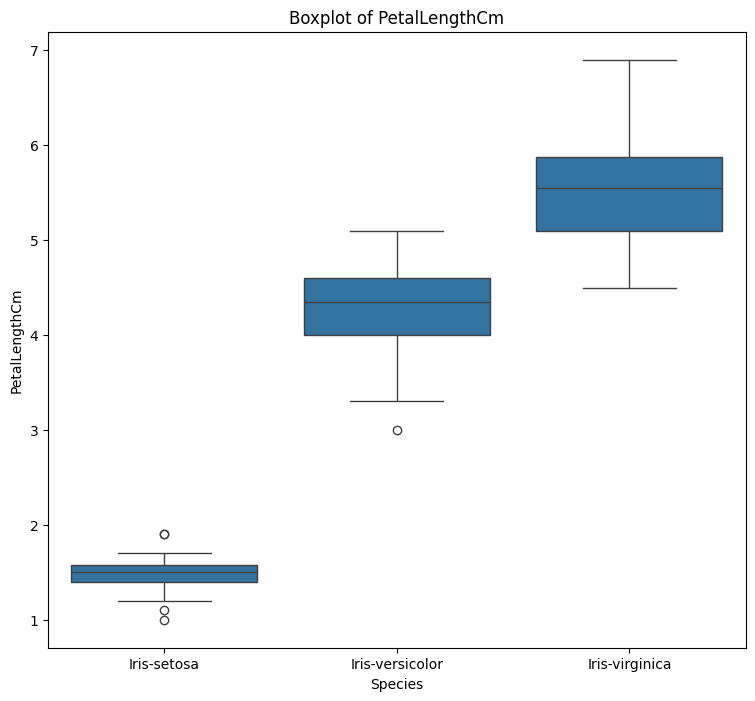

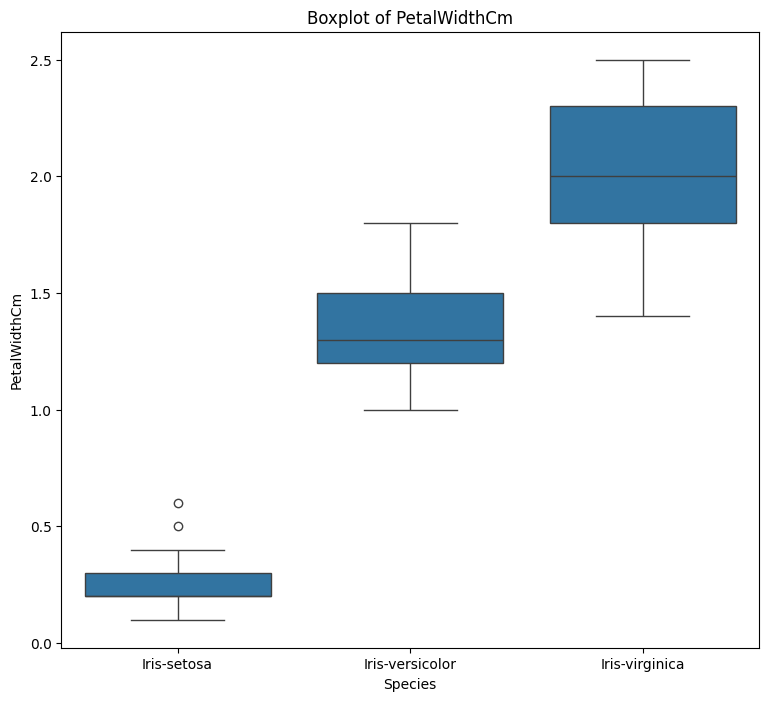

In [41]:
for feature in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    plt.figure(figsize=(9,8))
    sns.boxplot(x='Species',y=feature,data=data)
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [44]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
data = data.drop(columns=['Id'], errors='ignore')  # Drop 'Id' if it exists, otherwise ignore
X = data.drop(columns=['Species'])  # Replace 'Species' with the actual target column name if different
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Get feature importances
importances = dt_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


         Feature  Importance
2  PetalLengthCm    0.893264
3   PetalWidthCm    0.087626
1   SepalWidthCm    0.019110
0  SepalLengthCm    0.000000


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
data=data.drop(columns=['Id'],errors='ignore')
X = data.drop(columns=['Species'])  # Replace 'Species' with the actual target column name if different
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
log_reg_model=LogisticRegression()


In [53]:
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=log_reg_model.predict(X_test)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

